In [6]:
import torch.nn as nn
model = nn.Sequential(
                nn.Conv2d(1, 20, 5),
                nn.ReLU(),
                nn.Conv2d(20, 64, 5),
                nn.ReLU()
            )

model


Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 64, 5)
        
    def foward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2)
    
model = Model()
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
)

In [12]:
import torch
x = torch.randn(4)
y = torch.randn(4)

criterion = nn.MSELoss()
loss = criterion(x, y)
print(loss)

tensor(2.1480)


In [13]:
x = torch.randn(1, 4)
y = torch.LongTensor([1]).random_(4)
criterion = nn.CrossEntropyLoss()
loss = criterion(x, y)
print(loss)

tensor(1.1452)


In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.line = nn.Linear(in_features=10, out_features=10, bias=False)
        
    def forward(self, x):
        x = self.line(x)
        return x

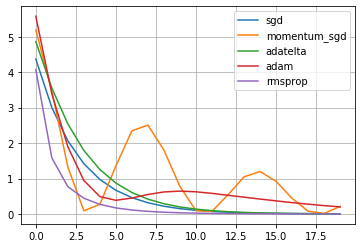

In [22]:
import torch
from torch import optim
import matplotlib.pyplot as plt

def main(opt_conf):
    loss_list = []
    x = torch.randn(1, 10)
    w = torch.randn(1, 1)
    y = torch.mul(w, x) + 2
    
    net = Net()
    
    criterion = nn.MSELoss()
    
    if opt_conf == "sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1)
    elif opt_conf == "momentum_sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
    elif opt_conf == "adadelta":
        optimizer = optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
    elif opt_conf == "adagrad":
        optimizer = optim.Adagrad(net.parameters())
    elif opt_conf =="adam":
        optimizer = optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
    elif opt_conf == "rmsprop":
        optimizer = optim.RMSprop(net.parameters())
    for epoch in range(20):
        optimizer.zero_grad()
        y_pred = net(x)
        
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data.item())
    return loss_list

loss_dict = {}
loss_dict["sgd"] = []
loss_dict["momentum_sgd"] = []
loss_dict["adadelta"] = []
loss_dict["adam"] = []
loss_dict["rmsprop"] = []
    
for key, value in loss_dict.items():
    loss_dict[key] = main(key)
    
plt.figure()
plt.plot(loss_dict["sgd"], label='sgd')
plt.plot(loss_dict["momentum_sgd"], label='momentum_sgd')
plt.plot(loss_dict["adadelta"], label='adatelta')
plt.plot(loss_dict["adam"], label='adam')
plt.plot(loss_dict["rmsprop"], label='rmsprop')
plt.legend()
plt.grid()